<a href="https://colab.research.google.com/github/yash2046/2216101_bootcamp_ml-concepts/blob/main/outbreak_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/outbreak_detect.csv')
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No


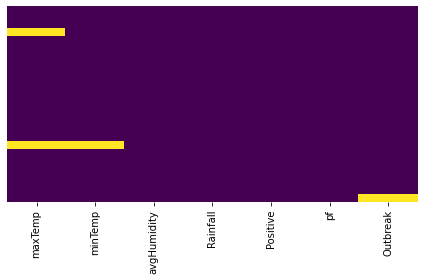

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [4]:
df = df.dropna()
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
4,34.0,24.0,59.16,9.06,4198,211,No
5,34.0,27.0,73.23,0.00,11808,712,Yes


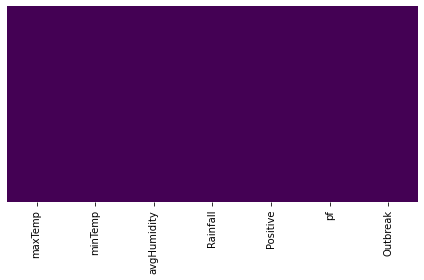

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [7]:
from sklearn import preprocessing
LE= preprocessing.LabelEncoder()
df.Outbreak = LE.fit_transform(df.Outbreak)
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,0
1,34.0,23.0,83.27,15.22,10717,677,1
2,40.0,23.0,50.74,0.00,1257,127,0
4,34.0,24.0,59.16,9.06,4198,211,0
5,34.0,27.0,73.23,0.00,11808,712,1


In [8]:
df = df.drop('Positive',axis=1)
df = df.drop('pf',axis=1)

In [9]:
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
0,29.0,18.0,49.74,0.00,0
1,34.0,23.0,83.27,15.22,1
2,40.0,23.0,50.74,0.00,0
4,34.0,24.0,59.16,9.06,0
5,34.0,27.0,73.23,0.00,1


In [10]:
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()
data_scaled=df.iloc[:,:-1].values
data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)

In [11]:
data_scaled.head()

,0,1,2,3
0,-1.329034,-2.078144,-1.197198,-0.684437
1,-0.196894,-0.333717,1.042817,0.918413
2,1.161674,-0.333717,-1.130392,-0.684437
3,-0.196894,0.015169,-0.567883,0.269690
4,-0.196894,1.061826,0.372082,-0.684437


In [12]:
data_scaled.columns=['maxTemp','minTemp','avgHumidity','Rainfall']

In [13]:
data_scaled.head()

,maxTemp,minTemp,avgHumidity,Rainfall
0,-1.329034,-2.078144,-1.197198,-0.684437
1,-0.196894,-0.333717,1.042817,0.918413
2,1.161674,-0.333717,-1.130392,-0.684437
3,-0.196894,0.015169,-0.567883,0.269690
4,-0.196894,1.061826,0.372082,-0.684437


In [14]:
data_scaled['Class'] = df.Outbreak

In [15]:
data_scaled

,maxTemp,minTemp,avgHumidity,Rainfall,Class
0,-1.329034,-2.078144,-1.197198,-0.684437,0.0
1,-0.196894,-0.333717,1.042817,0.918413,1.0
2,1.161674,-0.333717,-1.130392,-0.684437,0.0
3,-0.196894,0.015169,-0.567883,0.269690,NaN
4,-0.196894,1.061826,0.372082,-0.684437,0.0
5,-0.876178,0.015169,1.410252,3.675483,1.0
6,-0.423322,0.015169,0.686740,1.830415,1.0
7,-0.876178,0.015169,1.129666,0.489793,1.0
8,0.255962,0.015169,-0.952687,-0.461175,0.0
9,-0.649750,-0.333717,-0.678781,-0.684437,0.0


In [16]:
data_scaled = data_scaled[data_scaled['Class'].notna()]

In [17]:
#x = data_scaled.iloc[:,0:6]
#y = data_scaled.iloc[:,6:7]
import numpy as np

x=np.array(data_scaled[['maxTemp','minTemp','avgHumidity','Rainfall']])

y=np.array(data_scaled[['Class']])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=3)

In [19]:
x_train

array([[ 1.16167394, -0.33371661, -1.13039172, -0.68443683],
       [-1.10260577, -0.33371661,  1.27931169,  0.07486314],
       [ 1.16167394,  1.06182557, -0.24654431, -0.68443683],
       [ 1.84095785,  1.41071111,  0.09416784, -0.19473574],
       [-0.8761778 ,  0.01516894,  1.41025205,  3.67548256],
       [-0.8761778 , -0.33371661,  0.38009883, -0.16103588],
       [-0.8761778 ,  0.01516894,  1.12966557,  0.48979267],
       [ 0.25596205,  0.01516894, -0.95268695, -0.46117526],
       [-0.42332186,  0.01516894,  0.68673977,  1.83041522],
       [ 0.93524597,  0.36405448, -1.34550803, -0.68443683],
       [-0.64974983,  0.01516894,  1.31338291,  0.57088295],
       [-0.19689389, -2.07814433, -0.55184912, -0.68443683],
       [ 2.29381379,  2.80625329, -2.1992926 , -0.64441825],
       [-0.42332186, -0.68260215,  0.4041491 , -0.50014072],
       [-1.32903374, -2.07814433, -1.19719803, -0.68443683],
       [-0.64974983, -0.33371661, -0.6787811 , -0.68443683],
       [-0.19689389,  1.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [21]:
model.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [22]:
import numpy as np
y_pred=model.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0. 1.]
 [0. 0.]
 [1. 1.]]


In [23]:
print("Predicted value for training data:",model.score(x_train,y_train))
print("Training accuracy:",model.score(x_train,y_train)*100)

Predicted value for training data: 0.8333333333333334
Training accuracy: 83.33333333333334


In [24]:
print("Predicted value for testing data:",model.score(x_test,y_test))
print("Testing accuracy:",model.score(x_test,y_test)*100)

Predicted value for testing data: 0.6666666666666666
Testing accuracy: 66.66666666666666


In [25]:
accuracy=model.score(x,y)*100
print(accuracy)

80.95238095238095


In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1 0]
 [1 1]]


0.6666666666666666